In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [5]:
dataset = 'bison'

In [6]:
import requests
import json
url = "https://raw.githubusercontent.com/duhaime/umap-zoo/03819ed0954b524919671a72f61a56032099ba11/data/json/bison.json"
animal = np.array(json.loads(requests.get(url).text)['3d'])
np.shape(animal)

(50000, 3)

(-1.0595327718040621,
 0.9895327718040622,
 -0.49177443340691684,
 0.6626744334069168)

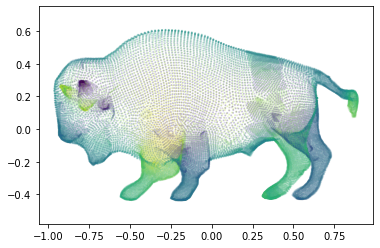

In [7]:
fig, ax = plt.subplots()
ax.scatter(animal[:,2], animal[:,1], s = 1, c = animal[:,0], alpha = 0.1)
ax.axis('equal')

In [8]:
X_train = animal
Y_train = animal[:, 2]
X_train_flat = X_train

### Create model and train

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
z = pca.fit_transform(X_train_flat)

### plot output

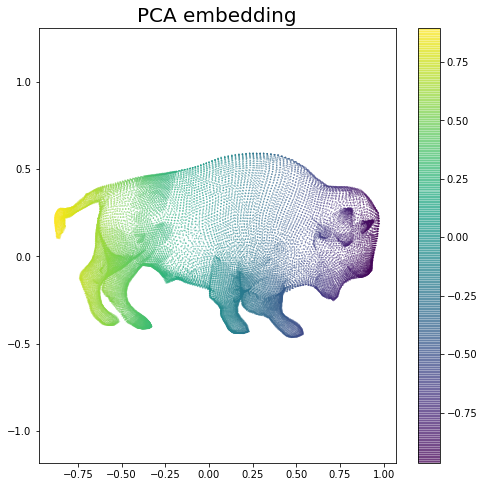

In [12]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train,
    #cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save model

In [13]:
import os
import pickle

In [14]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [15]:
output_dir = MODEL_DIR/'projections'/ dataset / 'PCA'
ensure_dir(output_dir)

In [16]:
with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

In [17]:
np.save(output_dir / 'z.npy', z)

## tsne

In [18]:
from openTSNE import TSNE

In [19]:
tsne = TSNE(
    n_components = 2,
    perplexity=1000,
)

In [20]:
embedding_train = tsne.fit(X_train_flat)

In [21]:
z = np.array(embedding_train)

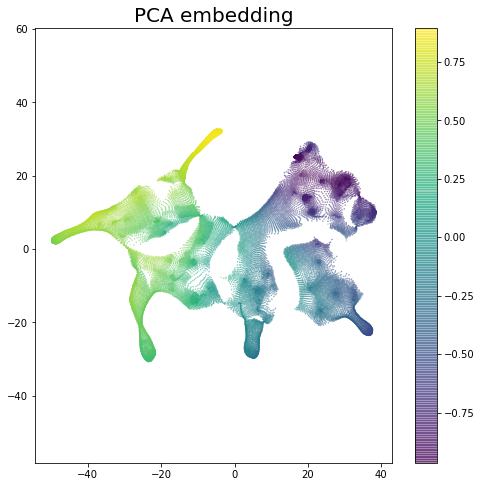

In [22]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train,
    #cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

#### save model

In [25]:
import os
import pickle

from tfumap.paths import ensure_dir, MODEL_DIR

output_dir = MODEL_DIR/'projections'/ dataset /  'TSNE'
ensure_dir(output_dir)

with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

np.save(output_dir / 'z.npy', z)